# output 基本输出

In [1]:
from pywebio.output import *

In [2]:
# Text Output
put_text("Hello world!")

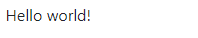

In [1]:
# Table Output
put_table([
    ['Commodity', 'Price'],
    ['Apple', '5.5'],
    ['Banana', '7'],
])

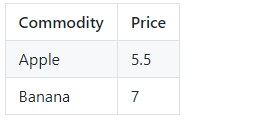

In [ ]:
# Image Output
put_image('https://www.python.org/static/img/python-logo.png')

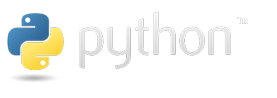

In [ ]:
# Markdown Output
put_markdown('~~Strikethrough~~')

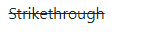

In [ ]:
# File Output, download file
put_file('hello_word.txt', b'hello word!')

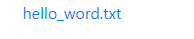

In [ ]:
# Show a PopUp
popup('popup title', 'popup text content')

# Show a notification message
toast('New message 🔔')

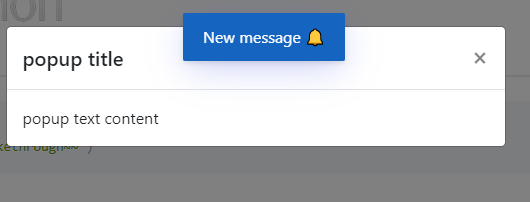

# 组合输出

In [ ]:
put_table([
    ['Type', 'Content'],
    ['html', put_html('X<sup>2</sup>')],
    ['text', '<hr/>'],  # equal to ['text', put_text('<hr/>')]
    ['buttons', put_buttons(['A', 'B'], onclick=put_text)],  
    ['markdown', put_markdown('`Awesome PyWebIO!`')],
    ['file', put_file('hello.text', b'hello world')],
    ['table', put_table([['A', 'B'], ['C', 'D']])]
])

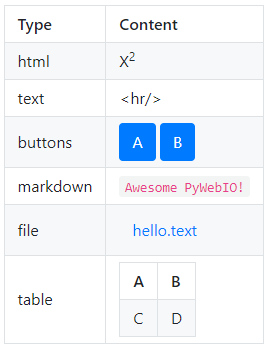

# output - 输出域Scope

### use_scope()

In [2]:
#可以使用 use_scope() 开启并进入一个新的输出域，或进入一个已经存在的输出域:
with use_scope('scope1'):  # 创建并进入scope 'scope1'
    put_text('text1 in scope1')  # 输出内容到 scope1

put_text('text in parent scope of scope1')  # 输出内容到 ROOT scope

with use_scope('scope1'):  # 进入之前创建的scope 'scope1'
    put_text('text2 in scope1')  # 输出内容到 scope1

> 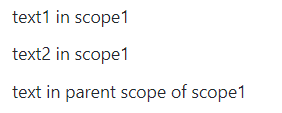

### clear()

In [2]:
#use_scope() 使用 clear 参数将scope中原有的内容清空:
with use_scope('scope2'): # 创建并进入scope 'scope2'
    put_text('create scope2')  # 输出内容到 scope2

put_text('text in parent scope of scope2') # 输出内容到 ROOT scope
 
with use_scope('scope2', clear=True):  # 进入之前的"scope2",清除之前的内容
    put_text('I have replace content of scope2!!')  # 重新输出内容到scope2

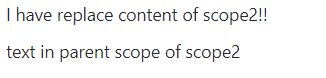

### use_scope装饰器+clear()

In [2]:
import time  
from datetime import datetime

@use_scope('time', clear=True)
def show_time():
    put_text(datetime.now())

while True:          
   show_time()    
   time.sleep(3)

#第一次调用 show_time 时，将会创建 time 输出域并在其中输出当前时间，之后每次调用 show_time() ，输出域都会被新的内容覆盖

### scope 嵌套

In [3]:
# PyWebIO应用只有一个 ROOT scope。
with use_scope('A'):
    put_text('Text in scope A')

    with use_scope('B'):
        put_text('Text in scope B')

with use_scope('C'):
    put_text('Text in scope C')

    
put_html("""<style>                                          
#pywebio-scope-A {border: 1px solid red;}                    
#pywebio-scope-B {border: 1px solid blue;margin:2px}         
#pywebio-scope-C {border: 1px solid green;margin-top:2px}    
</style>""")                                                 
put_text()                                                   
put_buttons([('Put text to %s' % i, i) for i in ('A', 'B', 'C')], lambda s: put_text(s, scope=s)).show()

1、初始运行结果：
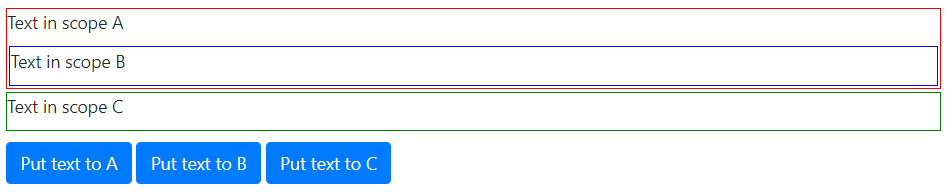
2、单击'Put text to A'
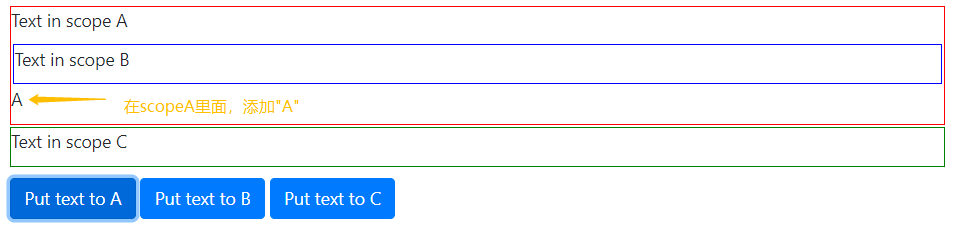
3、再单击'Put text to B'
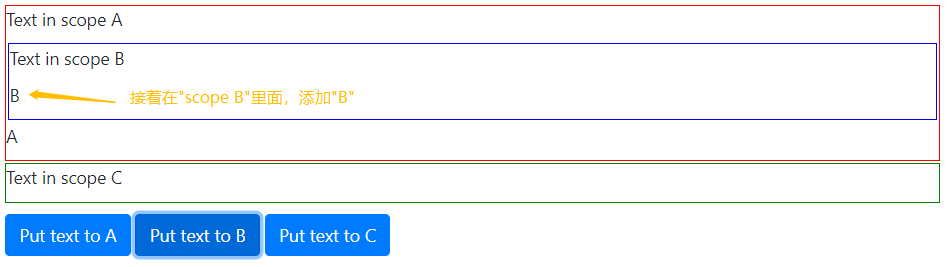
4、最后单击两次'Put text to C'
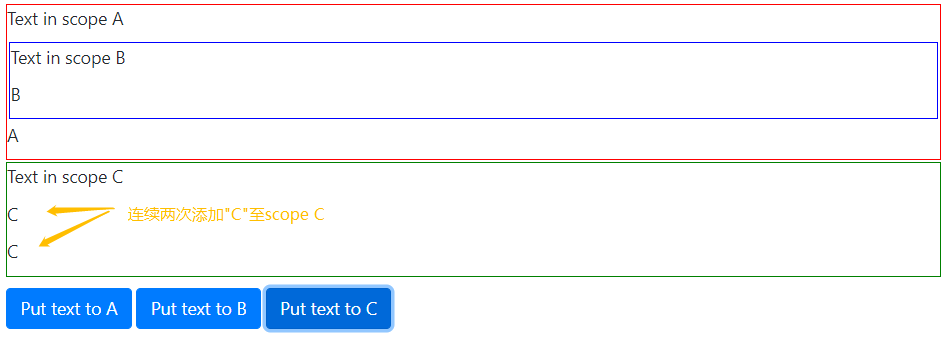

In [2]:
#重新建A+B \ C \ D , 3个scope。
with use_scope('A'):
    put_text('Text in scope A')

    with use_scope('B'):
        put_text('Text in scope B')

with use_scope('C'):
    put_text('Text in scope C')

with use_scope('D'):
    put_text('Text in scope D')    
    
put_html("""<style>                                          
#pywebio-scope-A {border: 1px solid red;}                    
#pywebio-scope-B {border: 1px solid blue;margin:2px}         
#pywebio-scope-C {border: 1px solid green;margin-top:502px}    
#pywebio-scope-D {border: 1px solid orange;margin-top:502px} 
</style>""").show()

#可对'C'分别进行测试滚动
scroll_to(scope='C',position='top')
scroll_to(scope='C',position='middle')
scroll_to(scope='C',position='bottom')

# 内容输出

## put_text

In [2]:
#sep
put_text('我是谁','我在哪','我在干嘛',sep='-',inline=True).show()
#inline 当两个put_text连续使用true时，才会显示同一行
put_text("小鲁班",inline=False).show()
put_text("小背包",inline=True).show()
put_text("小火箭",inline=True).show()
put_text("哒哒哒",inline=False).show()
put_text("嘟嘟嘟",inline=True).show()
put_text("hehehe",inline=False).show()
#position 按索引插入位置。

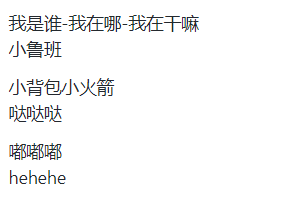

## put_markdown

In [2]:
# It is ugly without strip_indent or lstrip
put_markdown(r""" # H1
This is H1 first content.
dd""").show()

# Using lstrip to get beautiful indent
put_markdown(r""" # H2
    This is H2 second content.
    dd""", lstrip=True).show()

put_markdown(r""" # H2
    This is H2 second content.
    dd""").show()

# Using strip_indent to get beautiful indent
put_markdown(r""" # H3
    This is H3 third content.
    dd""", strip_indent=4).show()

put_markdown(r""" # H3
    This is H3 third content.
    dd""").show()

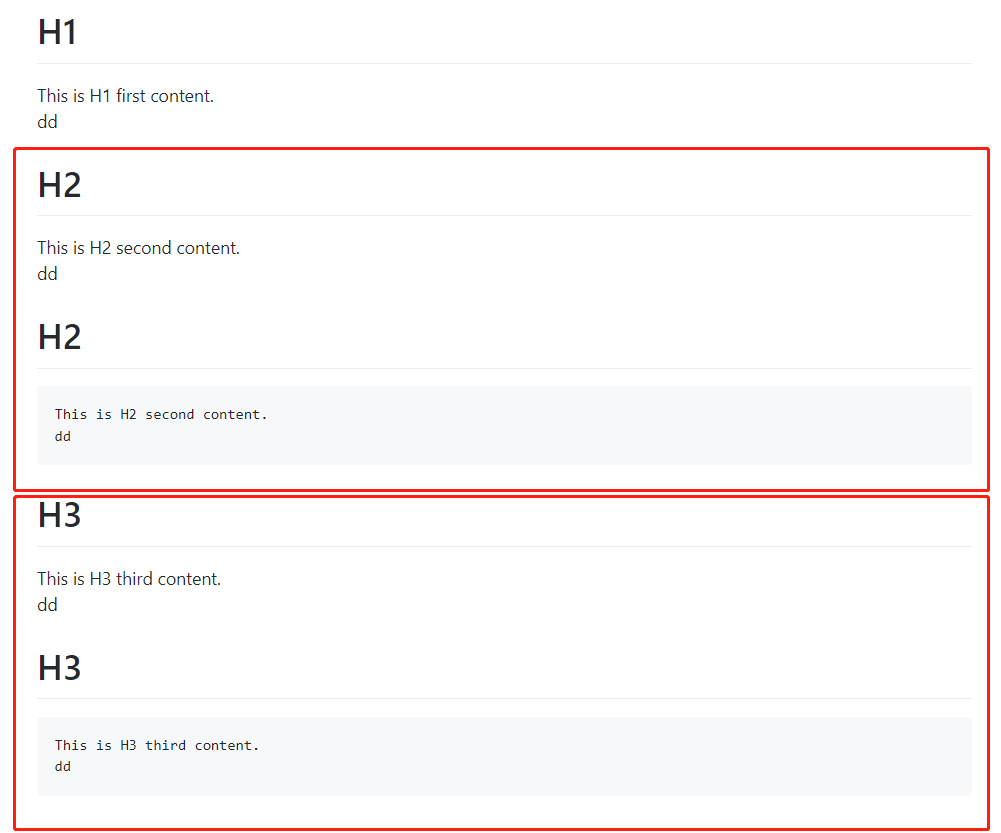

## put_link

In [2]:
put_link("你再百度一下试试？","https://www.baidu.com/",new_window=True).show()

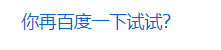

## put_processbar

In [3]:
put_processbar(name="process",init=0.35,label="我就是个进度条：").show()

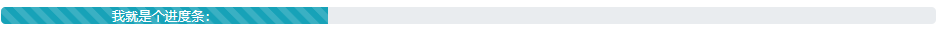

In [4]:
import time
put_processbar('bar');
for i in range(1, 11):
    set_processbar('bar', i / 10)
    time.sleep(0.1)

## put_table

In [ ]:
# 'Name' cell across 2 rows, 'Address' cell across 2 columns
put_table([
    [span('Name',row=2), span('Address', col=2)],
    ['City', 'Country'],
    ['Wang', 'Beijing', 'China'],
    ['Liu', 'New York', 'America'],
])

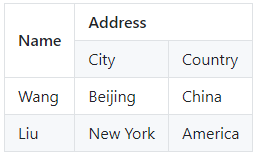

In [ ]:
# Use `put_xxx()` in `put_table()`
put_table([
    ['Type', 'Content'],
    ['html', put_html('X<sup>2</sup>')],
    ['text', '<hr/>'],
    ['buttons', put_buttons(['A', 'B'], onclick=put_text)],  
    ['markdown', put_markdown('`Awesome PyWebIO!`')],
    ['file', put_file('hello.text', b'hello world')],
    ['table', put_table([['A', 'B'], ['C', 'D']])]
])

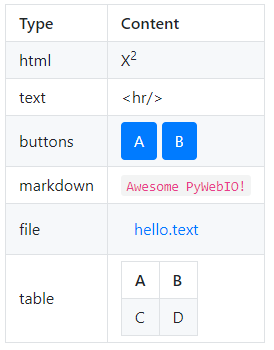

In [ ]:
# Set table header
put_table([
    ['Wang', 'M', 'China'],
    ['Liu', 'W', 'America'],
], header=['Name', 'Gender', 'Address'])

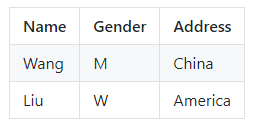

In [ ]:
# When ``tdata`` is list of dict
put_table([
    {"Course":"OS", "Score": "80"},
    {"Course":"DB", "Score": "93"},
], header=["Course", "Score"])  # or header=[(put_markdown("*Course*"), "Course"), (put_markdown("*Score*") ,"Score")]
 

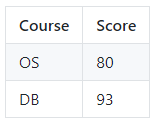

## span

In [3]:
put_table([
    ['C'],
    [span('E', col=2)],  # 'E' across 2 columns
], header=[span('A', row=2), 'B']).show()  # 'A' across 2 rows

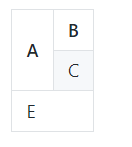

In [4]:
put_grid([
    [put_text('A'), put_text('B')],
    [span(put_text('A'), col=2)],  # 'A' across 2 columns
]).show()

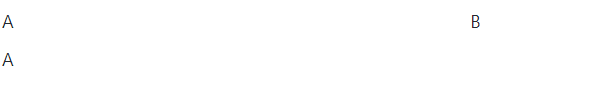

## put_buttons

In [3]:
put_buttons([  
    dict(label=i, value="I'm "+i, color=i)  
    for i in ['primary', 'secondary', 'success', 'danger', 'warning', 'info', 'light', 'dark']  
], onclick=put_text).show()

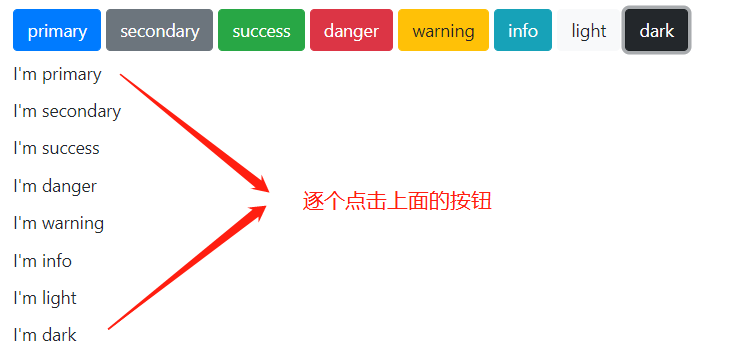

In [2]:
put_buttons([{'label':'success', 'value':"I'm success", 'color':"success"},
             {'label':'danger', 'value':"I'm danger", 'color':"danger"}], onclick=put_text).show()

# small
put_text("----------small-----------")
put_buttons([{'label':'success', 'value':"I'm success", 'color':"success"},
             {'label':'danger', 'value':"I'm danger", 'color':"danger"}], onclick=put_text,small=True).show()

#link_style
put_text("----------link_style-----------")
put_buttons([{'label':'success', 'value':"I'm success", 'color':"success"},
             {'label':'danger', 'value':"I'm danger", 'color':"danger"}], onclick=put_text,link_style=True).show()

#outline
put_text("----------outline-----------")
put_buttons([{'label':'success', 'value':"I'm success", 'color':"success"},
             {'label':'danger', 'value':"I'm danger", 'color':"danger"}], onclick=put_text,outline=True).show()

#group 
put_text("----------group-----------")
put_buttons([{'label':'success', 'value':"I'm success", 'color':"success"},
             {'label':'danger', 'value':"I'm danger", 'color':"danger"}], onclick=put_text,group=True).show()


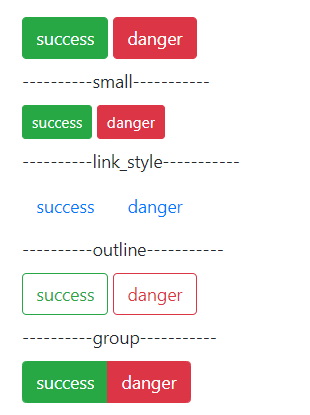

In [4]:
from functools import partial

def row_action(choice, id):
    put_text("You click %s button with id: %s" % (choice, id))

put_buttons(['edit', 'delete'], onclick=partial(row_action, id=1)).show()
#依次点击"edit","delete"

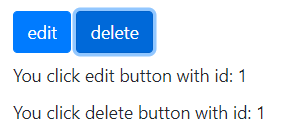

In [6]:
def edit():
    put_text("You click edit button")
def delete():
    put_text("You click delete button")

put_buttons(['edit', 'delete'], onclick=[edit, delete]).show()
#依次点击"edit","delete"

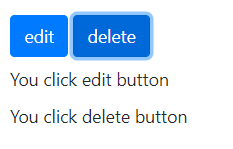

## put_image 图片

In [10]:
#读取本地图片
from pywebio import STATIC_PATH
img = open( 'testPic.jpg', 'rb').read()  
put_image(img, width='50px').show()

In [11]:
#读取网络图片
put_image('https://www.python.org/static/img/python-logo.png').show()

## put_file 文件下载

In [13]:
content = open('TXT测试文件.txt', 'rb').read()    
put_file('hello-world.txt', content, 'download me').show()

## put_tabs 横向标签栏

In [14]:
put_tabs([
    {'title': 'Text', 'content': 'Hello world'},
    {'title': 'Markdown', 'content': put_markdown('~~Strikethrough~~')},
    {'title': 'More content', 'content': [
        put_table([
            ['Commodity', 'Price'],
            ['Apple', '5.5'],
            ['Banana', '7'],
        ]),
        put_link('pywebio', 'https://github.com/wang0618/PyWebIO')
    ]},
]).show()
#3个标签里面都有内容

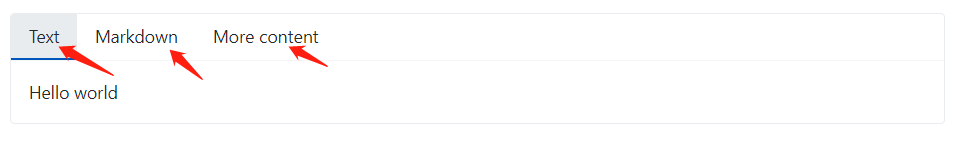

## put_collapse 输出可折叠的内容

In [ ]:
put_collapse('Collapse title', [
    'text',
    put_markdown('~~Strikethrough~~'),
    put_table([
        ['Commodity', 'Price'],
        ['Apple', '5.5'],
    ])
], open=True).show()

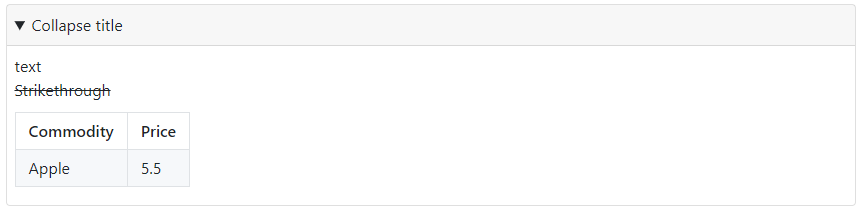

## put_scrollable 固定高度内容输出区域，内容超出则显示滚动条

## put_row 行布局输出内容

In [ ]:
# Two code blocks of equal width, separated by 10 pixels
put_row([put_code('A'), None, put_code('B')]).show()

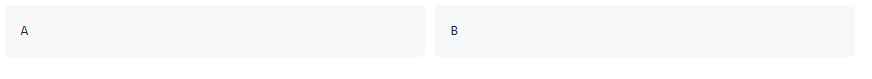

In [ ]:
# The width ratio of the left and right code blocks is 2:3, which is equivalent to size='2fr 10px 3fr'
put_row([put_code('A'), None, put_code('B')], size='40% 10px 60%').show()

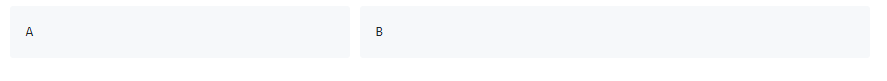

## put_column 列布局输出内容

In [16]:
原理同上

## put_grid 网格布局输出内容

In [17]:
put_grid([
    [put_text('A'), put_text('B'), put_text('C')],
    [None, span(put_text('D'), col=2, row=1)],
    [put_text('E'), put_text('F'), put_text('G')],
], cell_width='100px', cell_height='100px').show()

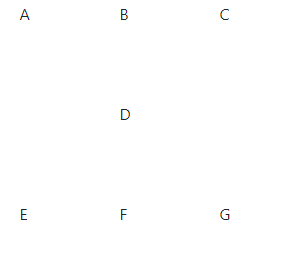

## style 样式

In [18]:
put_text('hello').style('color: red; font-size: 20px').show()

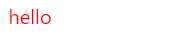

In [19]:
# in combined output
put_row([
    put_text('hello').style('color: red'),
    put_markdown('markdown')
]).style('margin-top: 20px').show()

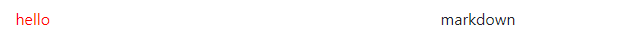